In [41]:
import json
import pandas as pd
import matplotlib as plt
import numpy as np

# Get a feel of the data (Using NY-Times 2019 Quotes)

Let's first load the data and convert it to tabular form

In [42]:
data = []
with open('quotes-2019-nytimes.json') as f:
    for line in f:
        data.append(json.loads(line))

In [43]:
def generate_data_model(data,n):
    """
    Converting json to tabular data
    Restrictions:
    -> Allowing up to 3 speakers and their correspond probabilities
    -> Not looking at urls, quids
    """
    # Create initial dataframe 
    df = pd.DataFrame()
    
    # For each line in json document retrieve info and append to df
    for i in range(n):
        current_data = dict(data[i])
        current_df = pd.DataFrame()
        current_df['quoteID'] = [current_data['quoteID']]
        current_df['quotation'] = [current_data['quotation']]
        current_df['date'] = [current_data['date']]
        current_df['numOccurrences'] = [current_data['numOccurrences']]
        current_df['phase'] = [current_data['phase']]
        
        # Select only the 3 most probable speakers of the quote
        for j in range(3):
            if j < len(current_data['probas']):
                current_df[f"{'speaker'+str(j+1)}"] = [current_data['probas'][j][0]]
                current_df[f"{'probas'+str(j+1)}"] = [current_data['probas'][j][1]]
            else:
                current_df[f"{'speaker'+str(j+1)}"] = [np.nan]
                current_df[f"{'probas'+str(j+1)}"] = [0]
        df = df.append(current_df)
    
    
    # Convert numeric columns to int (stored as object prior)
    df['numOccurrences'] = pd.to_numeric(df['numOccurrences'])
    df['count'] = 1
    
    return df

In [44]:
df = generate_data_model(data,50000)

## Analysis

### Who has most quotes attributed to them?

In [106]:
top_speakers = df.loc[df.speaker1 != 'None'].groupby(by=['speaker1']).sum().sort_values(by='numOccurrences',ascending=False).reset_index()

<AxesSubplot:xlabel='speaker1'>

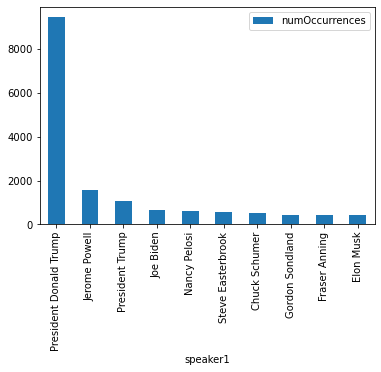

In [107]:
top_speakers[0:10].plot.bar(x='speaker1', y='numOccurrences', rot=90);

In [59]:
df['numOccurrences'].sum()

6130

In [ ]:
df.loc[df.speaker1 != 'None'].sort_values(by='probas1',ascending=False)

In [110]:
df.loc[df.quoteID == '2019-07-10-019478']

,quoteID,quotation,date,numOccurrences,phase,speaker1,probas1,speaker2,probas2,speaker3,probas3,count
0,2019-07-10-019478,go back and help fix the totally broken and cr...,2019-07-10 17:01:42,2737,E,President Donald Trump,0.448,None,0.2807,Donald Trump,0.0817,1


In [111]:
len(data)

207527

In [40]:

df[df['quotation'].str.contains(r'Apple')]


quoteID                                           2019-11-21-109544
quotation         Today I opened a major Apple Manufacturing pla...
date                                            2019-11-21 00:00:00
numOccurrences                                                  108
phase                                                             E
speaker1                                                       None
probas1                                                      0.7843
speaker2                                     President Donald Trump
probas2                                                      0.1452
speaker3                                               Donald Trump
probas3                                                       0.033
count                                                             1
Name: 0, dtype: object